# Entrenament #

Dividir el conjunt de dades, codificar variables categòriques, estandarditzar les característiques i reduir la dimensionalitat del conjunt de dades. Recorda quin conjunt de dades has d'utilitzar a cada moment.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
import warnings
import pickle

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Modelos de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

from scipy import stats

In [17]:
banc_transformed= pd.read_csv ('banc_transformed.csv') # carreguem el dataset

In [18]:
banc_def = banc_transformed.copy()

In [19]:
# Convertir la variable 'deposit' a formato numérico
banc_def['deposit'] = banc_transformed['deposit'].map({'no': 0, 'yes': 1})

In [20]:
banc_def.describe()

,deposit,age,balance,duration,campaign,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.473840,0.131481,0.616985,0.326798,0.254211,2.509694,0.015051,0.473123,0.130801,0.254256
std,0.499338,0.700565,2.033678,0.969632,1.361039,5.224082,0.121761,0.499299,0.337198,0.435461
min,0.000000,-1.235294,-4.663934,-0.706704,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.411765,-0.269861,-0.326816,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.588235,0.730139,0.673184,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.294118,50.853720,10.128492,30.500000,41.156627,1.000000,1.000000,1.000000,1.000000


In [21]:
# Llistat de columnes que vols eliminar
columnes_a_eliminar = [
    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services',
    'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
    'marital_divorced', 'marital_married', 'marital_single',
    'education_primary', 'education_secondary', 'education_tertiary', 
    'education_unknown',
    
    # Eliminar les columnes dels mesos
    'month_apr', 'month_aug', 'month_dec', 'month_feb', 
    'month_jan', 'month_jul', 'month_jun', 'month_mar', 
    'month_may', 'month_nov', 'month_oct', 'month_sep',
    # Els dies del mes
    'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 
    'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 
    'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 
    'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 
    'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 
    'day_31',
     # Eliminar campaign
    'campaign'
]

# Eliminar les columnes no desitjades
banc_def = banc_def.drop(columns=columnes_a_eliminar)

# Mostrar les columnes restants
print("Columnes restants després d'eliminar les no desitjades:")
print(banc_def.columns.tolist())


Columnes restants després d'eliminar les no desitjades:
['deposit', 'age', 'balance', 'duration', 'pdays', 'default_numeric', 'housing_numeric', 'loan_numeric', 'contact_previ_numeric']


In [22]:
banc_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   deposit                11162 non-null  int64  
 1   age                    11162 non-null  float64
 2   balance                11162 non-null  float64
 3   duration               11162 non-null  float64
 4   pdays                  11162 non-null  float64
 5   default_numeric        11162 non-null  int64  
 6   housing_numeric        11162 non-null  int64  
 7   loan_numeric           11162 non-null  int64  
 8   contact_previ_numeric  11162 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 785.0 KB


Escalador robusto guardado exitosamente.
Best params for logistic: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best params for decision_tree: {'classifier__max_depth': 10}
Best params for random_forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best params for gradient_boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Best params for xgboost: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 200}
--- logistic ---
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1762
           1       0.79      0.73      0.76      1587

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusion Matrix:
 [[1460  302]
 [ 432 1155]]




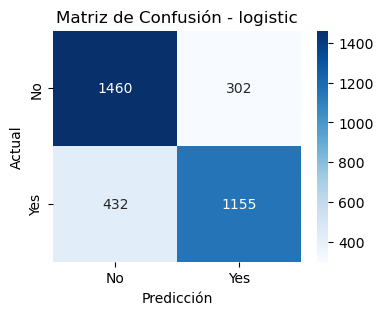

--- decision_tree ---
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1762
           1       0.77      0.77      0.77      1587

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Confusion Matrix:
 [[1395  367]
 [ 363 1224]]




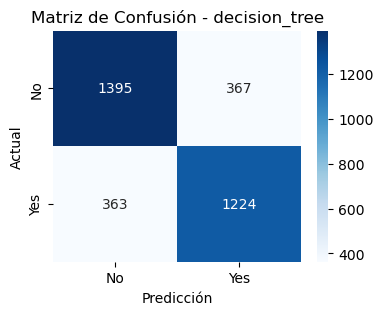

--- random_forest ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1762
           1       0.79      0.82      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1409  353]
 [ 289 1298]]




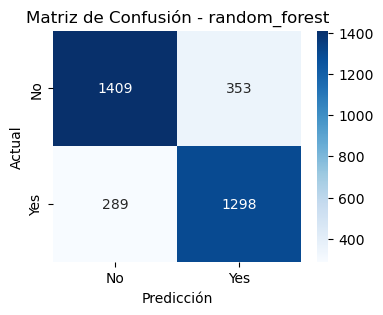

--- gradient_boosting ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1762
           1       0.79      0.80      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1433  329]
 [ 316 1271]]




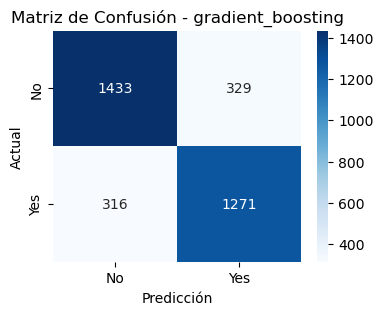

--- xgboost ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1762
           1       0.79      0.81      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1428  334]
 [ 306 1281]]




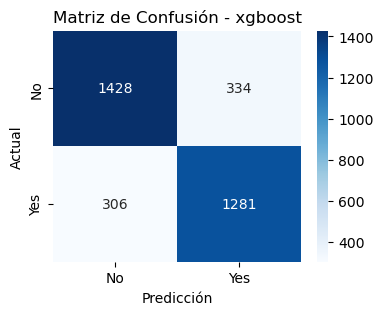

Modelo de Random Forest guardado exitosamente.


In [23]:
# Separar las variables independientes (features) y la variable dependiente (target)
target = 'deposit'
X = banc_def.drop(columns=[target])  # Features
y = banc_def[target]  # Target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Guardar los conjuntos en archivos CSV
X_train.to_csv('banc_train.csv', index=False)
X_test.to_csv('banc_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Escalar las características
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

# Guardar el escalador con pickle
with open('robust_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(robust_scaler, scaler_file)
print("Escalador robusto guardado exitosamente.")

# Definir los modelos elegidos
models = {
    'logistic': LogisticRegression(random_state=42, max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'xgboost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Crear una pipeline 
pipelines = {name: Pipeline([
    ('classifier', model)
]) for name, model in models.items()}

# Definir los parámetros para Grid Search
param_grids = {
    'logistic': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30]
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'xgboost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

# Aplicar los mejores resultados para Grid Search para cada modelo a fin de evaluar el rendimiento
best_estimators = {}
for name, pipeline in pipelines.items():
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f'Best params for {name}: {grid_search.best_params_}')
    else:
        pipeline.fit(X_train_scaled, y_train)
        best_estimators[name] = pipeline

# Evaluación de los modelos
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculo de la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'--- {name} ---')
    print(f'Accuracy: {score:.2f}')
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

    # Visualización de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicción')
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

# Acceder al mejor modelo de Random Forest y guardarlo con pickle
best_random_forest_model = best_estimators['random_forest']
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_random_forest_model, model_file)

print("Modelo de Random Forest guardado exitosamente.")

## Visualización de Curvas con el Modelo Entrenado ##

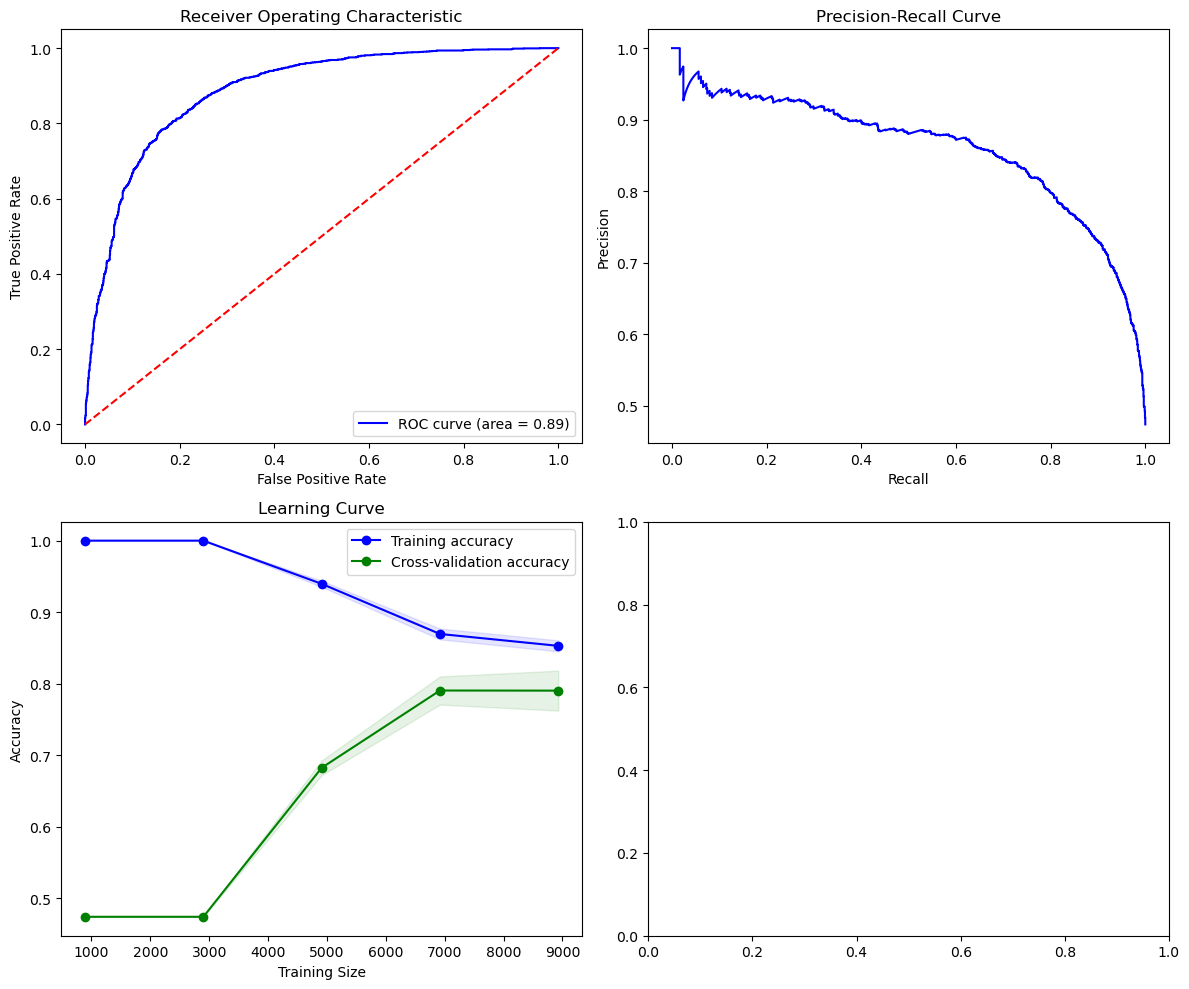

In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

# Obtener el mejor modelo
rf_model = best_estimators['random_forest']

# Predecir probabilidades en el conjunto de prueba
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear la figura con subtramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Curva ROC
axs[0, 0].plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic')
axs[0, 0].legend(loc='lower right')

# Curva de Precisión-Recall
axs[0, 1].plot(recall, precision, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# Curvas de Aprendizaje
axs[1, 0].plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
axs[1, 0].plot(train_sizes, test_mean, color='green', marker='o', label='Cross-validation accuracy')
axs[1, 0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
axs[1, 0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
axs[1, 0].set_title('Learning Curve')
axs[1, 0].set_xlabel('Training Size')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


--- random_forest ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1762
           1       0.79      0.82      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1409  353]
 [ 289 1298]]

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
